# Sanity Tests

In [1]:
import time

import numpy as np
from matplotlib import pyplot as plt
import torch
import torchvision.transforms.functional as F

from dataset import load_sanity_dataset
from utils import show_result
from train import train

from models.UNet import UNet
from models.ViT import ViT
from models.ViT_UNet import ViT_UNet

### Load Sanity Dataset Object

Loading 2D sanity dataset...
MRI shape torch.Size([3, 256, 256])
Mask shape torch.Size([1, 256, 256])


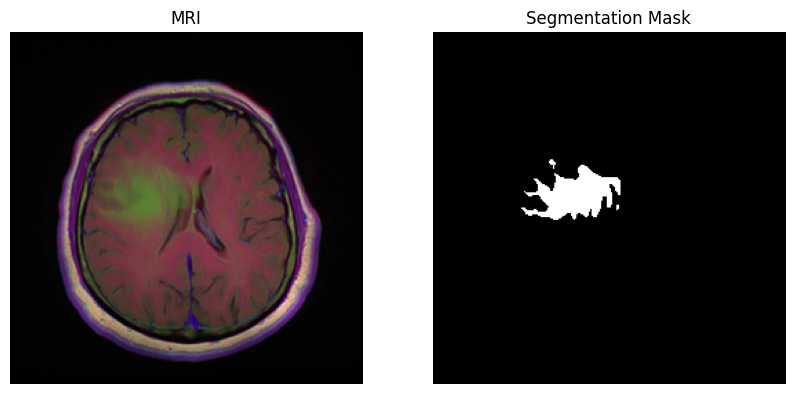

In [2]:
sanity_data = load_sanity_dataset()

X = sanity_data[0][0]
Y = sanity_data[0][1]
print('MRI shape', X.shape)
print('Mask shape',Y.shape)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(F.to_pil_image(X))
plt.title('MRI')
plt.axis('off')

plt.subplot(122)
plt.imshow(F.to_pil_image(Y), cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.show()

### Select Model

In [3]:
net = UNet()
#net = ViT()
#net = ViT_UNet()


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

tensor(0.4719, grad_fn=<MinBackward1>) tensor(0.4755, grad_fn=<MaxBackward1>)


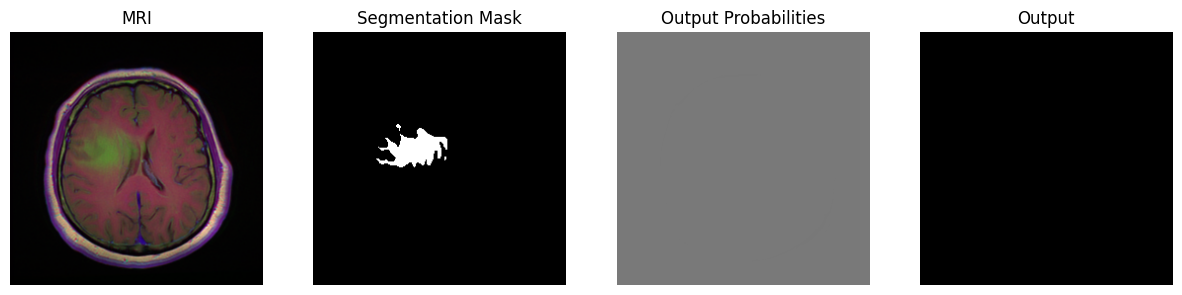

In [17]:
net = UNet()
net.eval()
y_prob = net(X.unsqueeze(0)).to('cpu').squeeze()
show_result(X, Y, y_prob)

In [ ]:
num_epoch = 25
batch_size = 1
optimizer=torch.optim.SGD(net.parameters(), lr=0.5, momentum=0.9)

start_time = time.time()

loss_graph, iterations = train(net,
                               sanity_data,
                               num_epoch,
                               device,
                               batch_size=batch_size,
                               optimizer=optimizer)

end_time = time.time()
duration = time.strftime("%Hh %Mm %Ss", time.gmtime(end_time-start_time))
print(f'Training took {duration}')

plt.figure(figsize=(6, 3))
plt.plot(np.arange(0, iterations), loss_graph)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss')
plt.show()

In [ ]:
net.eval()

y_prob = net(X.unsqueeze(0)).squeeze().detach()

print(X.shape)
print(y_prob.shape)
print(y_prob.min().item(), y_prob.max().item())

show_result(X, Y, y_prob, include_dice=True, include_hd95=True)
